ANALYSIS OF HOUSING PRICES

DATASET DESCRIPTION:

The housing dataset is a collection of information on various properties in the real estate market. The dataset consists of several attributes, including price, living area, number of bathrooms, number of bedrooms, presence of fireplaces, pool availability, garage spaces, lot size, and age of the property.

QUESTIONS WE WILL BE LOOKING INTO:

We will be have two Anova questions and two regression questions:

Anova Questions:
Question 1: Is there a significant difference in house prices between houses with and without a pool?
Question 2: Is there a significant difference in house prices based on the number of garage spaces?

Regression Questions:
Regression question 1: Predict house prices based on living area and age?
Regression question 2: Predict house prices based on the number of bedrooms, bathrooms, and fireplaces

METHODOLOGIES AND LIBRARIES USED FOR ANALYSIS
LIBRARIES:

METHODOLOGIES:


In [1]:
#importing the necessary libraries required for the EDA analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#linear regression libraries
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression

In [3]:

# Loading the dataset from the Excel file
Housing_prices = pd.read_excel("C://Users//sandr//Downloads//Assignment//housing_prices.csv")

In [4]:
#checking the dataset
Housing_prices.head()

,Price,Living.Area,Bathrooms,Bedrooms,Fireplaces,pool,Garage_spaces,Lot.Size,Age,Fireplace
0,140238,1322,1.0,3,0,1,1,1.00,130,False
1,109999,1218,1.5,3,1,1,0,1.43,0,True
2,174208,2372,2.0,3,1,0,2,0.44,2,True
3,101230,1032,1.0,2,1,0,1,0.12,23,True
4,120476,1120,2.0,3,0,0,1,0.73,7,False


In [5]:
Housing_prices.tail()

,Price,Living.Area,Bathrooms,Bedrooms,Fireplaces,pool,Garage_spaces,Lot.Size,Age,Fireplace
695,194880,2278,2.5,4,1,0,2,0.45,0,True
696,202751,2202,2.5,4,1,0,2,1.01,6,True
697,102530,1202,1.5,2,0,1,1,0.15,18,False
698,88092,1572,1.5,4,1,0,1,0.06,50,True
699,45004,960,1.0,2,0,0,1,0.54,11,False


In [6]:
#Checking the available information in the dataset
Housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          700 non-null    int64  
 1   Living.Area    700 non-null    int64  
 2   Bathrooms      700 non-null    float64
 3   Bedrooms       700 non-null    int64  
 4   Fireplaces     700 non-null    int64  
 5   pool           700 non-null    int64  
 6   Garage_spaces  700 non-null    int64  
 7   Lot.Size       693 non-null    float64
 8   Age            700 non-null    int64  
 9   Fireplace      700 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 50.0 KB


In [7]:
Housing_prices.isnull().sum()

Price            0
Living.Area      0
Bathrooms        0
Bedrooms         0
Fireplaces       0
pool             0
Garage_spaces    0
Lot.Size         7
Age              0
Fireplace        0
dtype: int64

There are 7 null values in the column lot.size column, we have to clean the data by filling the missing values instead of dropping them, we shall use the fillna() method to impute the missing values using forward fill interpolation by specifying method='ffill'

In [8]:
Housing_prices = Housing_prices.fillna(method='ffill')

In [9]:
Housing_prices.isnull().sum()

Price            0
Living.Area      0
Bathrooms        0
Bedrooms         0
Fireplaces       0
pool             0
Garage_spaces    0
Lot.Size         0
Age              0
Fireplace        0
dtype: int64

In [10]:
#checking the info again
Housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          700 non-null    int64  
 1   Living.Area    700 non-null    int64  
 2   Bathrooms      700 non-null    float64
 3   Bedrooms       700 non-null    int64  
 4   Fireplaces     700 non-null    int64  
 5   pool           700 non-null    int64  
 6   Garage_spaces  700 non-null    int64  
 7   Lot.Size       700 non-null    float64
 8   Age            700 non-null    int64  
 9   Fireplace      700 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 50.0 KB


Lots.size has now 700 objects

# PERFROMING DESCRIPTIVE STATISTICS ON DATASET

In [11]:
print(Housing_prices.describe())

               Price  Living.Area   Bathrooms    Bedrooms  Fireplaces  \
count     700.000000   700.000000  700.000000  700.000000  700.000000   
mean   166579.212857  1817.295714    1.922857    3.184286    0.627143   
std     76638.887925   682.992027    0.659837    0.738505    0.565691   
min     16858.000000   690.000000    1.000000    1.000000    0.000000   
25%    111361.500000  1326.000000    1.500000    3.000000    0.000000   
50%    150228.000000  1664.000000    2.000000    3.000000    1.000000   
75%    205292.250000  2248.250000    2.500000    4.000000    1.000000   
max    599701.000000  5228.000000    4.500000    5.000000    4.000000   

             pool  Garage_spaces    Lot.Size         Age  
count  700.000000     700.000000  700.000000  700.000000  
mean     0.340000       1.392857    0.539971   28.741429  
std      0.474047       0.911667    0.680741   36.313297  
min      0.000000       0.000000    0.000000    0.000000  
25%      0.000000       1.000000    0.200000   

# PERFORMING EDA ON THE DATASET

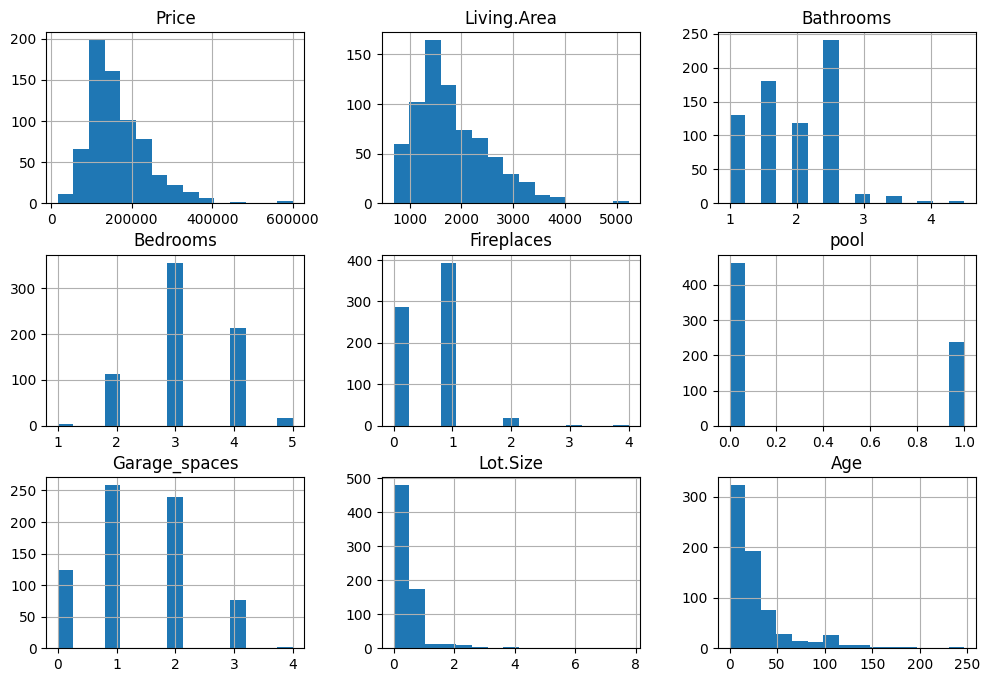

In [12]:
Housing_prices.hist(bins=15, figsize=(12, 8))
plt.show()

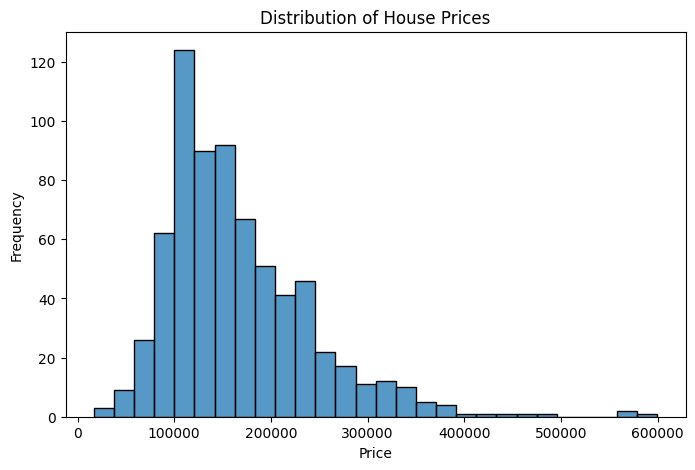

In [13]:
# Visualize the distribution of house prices using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(Housing_prices["Price"])
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


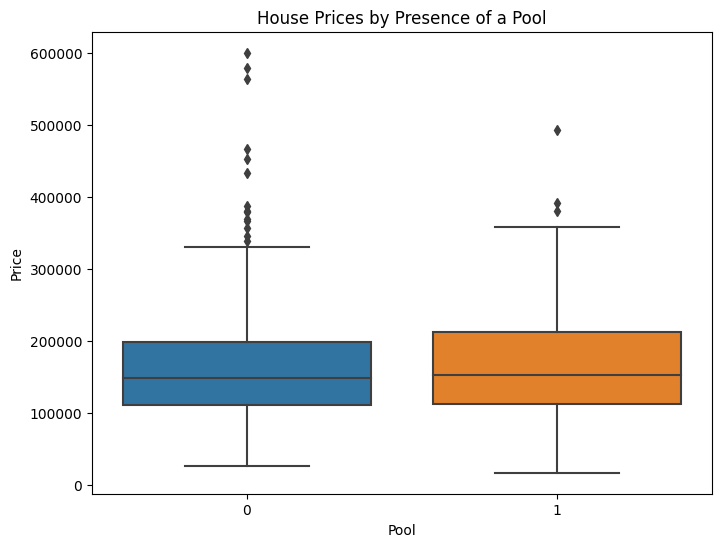

In [14]:
# Boxplots to visualize the relationships between categorical variables and house prices
plt.figure(figsize=(8, 6))
sns.boxplot(x="pool", y="Price", data=Housing_prices)
plt.title("House Prices by Presence of a Pool")
plt.xlabel("Pool")
plt.ylabel("Price")
plt.show()

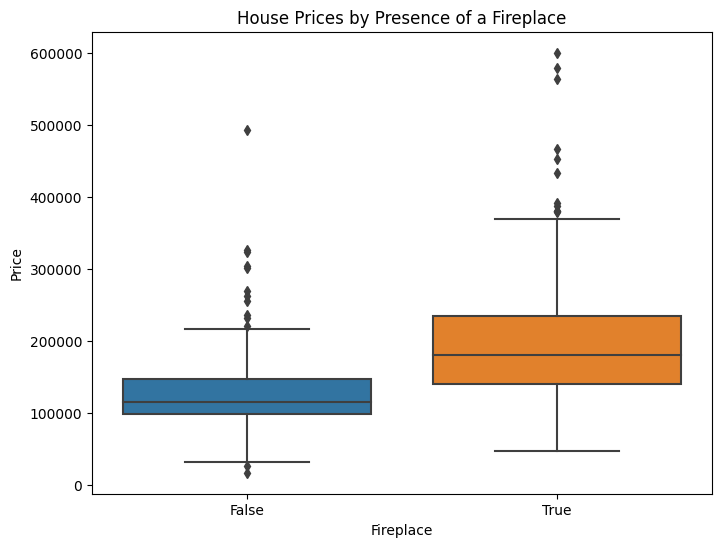

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Fireplace", y="Price", data=Housing_prices)
plt.title("House Prices by Presence of a Fireplace")
plt.xlabel("Fireplace")
plt.ylabel("Price")
plt.show()

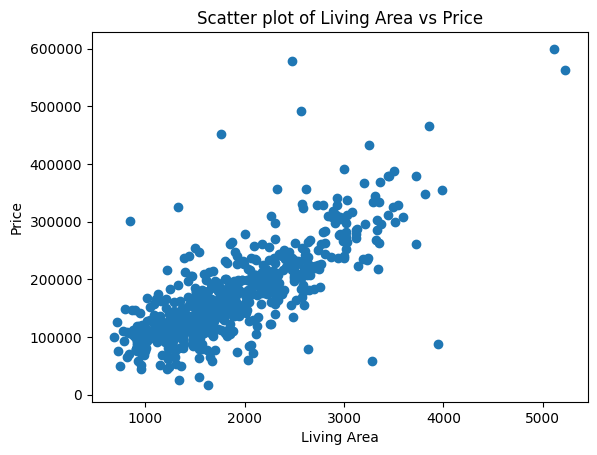

In [16]:
#scatter plot to visualize the relationship between living area and price from the housing dataset.
x = Housing_prices["Living.Area"]
y = Housing_prices["Price"]

plt.scatter(x, y)
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.title("Scatter plot of Living Area vs Price")
plt.show()

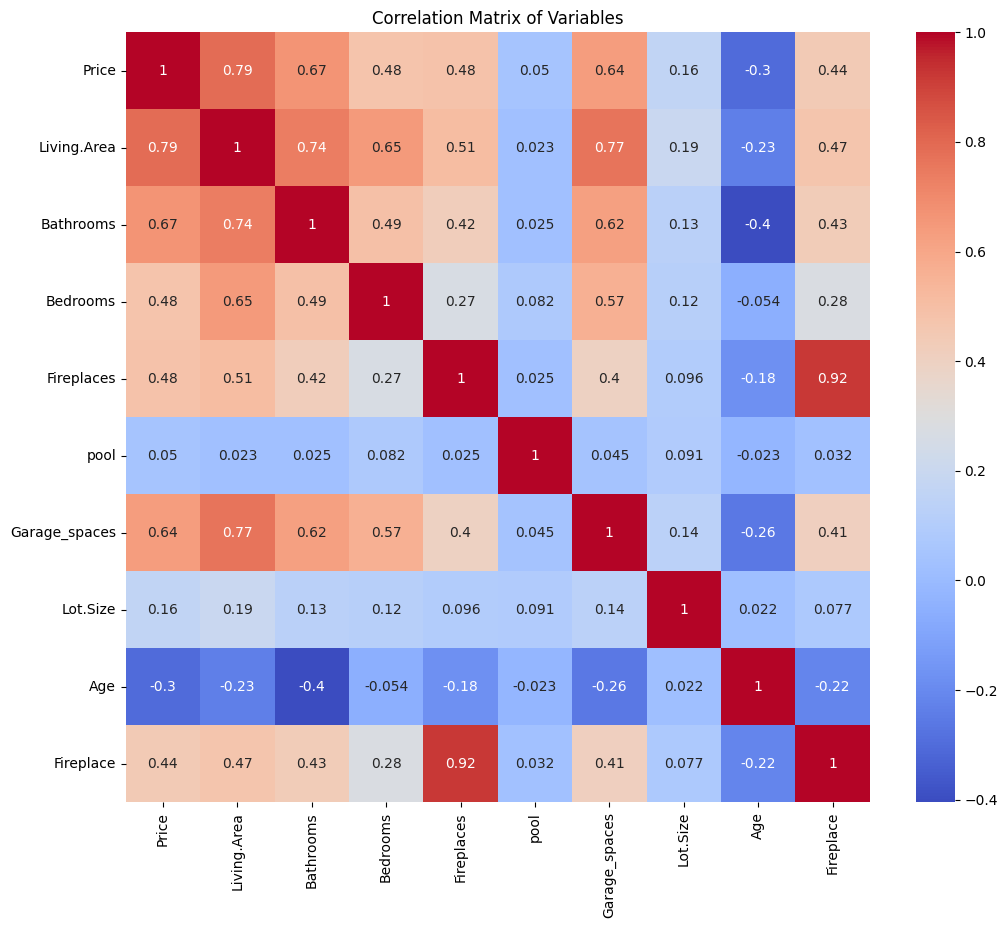

In [17]:
# Correlation matrix
corr_matrix = Housing_prices.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Variables")
plt.show()

# RESEARCH QUESTIONS

ANOVA Question 1: Is there a significant difference in house prices between houses with and without a pool?

In [18]:
#importing stats module  from scipy library
from scipy import stats

prices_with_pool = Housing_prices.loc[Housing_prices["pool"] == 1, "Price"]
prices_without_pool = Housing_prices.loc[Housing_prices["pool"] == 0, "Price"]

anova_result = stats.f_oneway(prices_with_pool, prices_without_pool)
print("ANOVA F-value:", anova_result.statistic, "p-value:", anova_result.pvalue)

ANOVA F-value: 1.7253809431756513 p-value: 0.18943345930940275


P-value is greater than 0.05 hence there is no significant difference in house prices based on houses with and without a pool?

ANOVA Question 2: Is there a significant difference in house prices based on the number of garage spaces?

In [19]:
prices_garage_0 = Housing_prices.loc[Housing_prices["Garage_spaces"] == 0, "Price"]
prices_garage_1 = Housing_prices.loc[Housing_prices["Garage_spaces"] == 1, "Price"]
prices_garage_2 = Housing_prices.loc[Housing_prices["Garage_spaces"] == 2, "Price"]

anova_result = stats.f_oneway(prices_garage_0, prices_garage_1, prices_garage_2)
print("ANOVA F-value:", anova_result.statistic, "p-value:", anova_result.pvalue)


ANOVA F-value: 139.0780794647917 p-value: 1.3454804628536644e-50


P-value is less than 0.05 with a great difference which shows that there is a significant difference in house prices based on the number of garage spaces.

# LINEAR REGRESSION QUESTIONS AND  MODEL

 Regression Question 1: Predict house prices based on living area and age

In [20]:
X = Housing_prices[["Living.Area", "Age"]]
y = Housing_prices["Price"]

model = LinearRegression().fit(X, y)
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Regression Coefficients: [  85.58363373 -256.550498  ]
Intercept: 18422.0698744682


Regression Question 2: Predict house prices based on the number of bedrooms, bathrooms, and fireplaces

In [21]:
X = Housing_prices[["Bedrooms", "Bathrooms", "Fireplaces"]]
y = Housing_prices["Price"]

model = LinearRegression().fit(X, y)
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Regression Coefficients: [18386.67362361 55946.80319598 30905.45092868]
Intercept: -18929.05223786377


In [22]:
# Split the dataset into training (80%) and testing (20%) sets
#importing the 'train_test_split' function from the 'model_selection' module of scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

NameError: name 'features' is not defined